In [9]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#### load the movie dataset and create their dataframes

auto_df = pd.read_csv("automobile.txt", sep=",")
auto_df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Check for missing data

In [10]:
# get the number of missing data points per column
missing_values_count = auto_df.isnull().sum()
missing_values_count

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No missing data so we can now drop the columns we don't need

In [11]:
auto_df.drop(['symboling', 'normalized-losses', 'curb-weight', 'bore', 'stroke', 'compression-ratio'],axis=1, inplace=True)
auto_df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,four,130,mpfi,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,four,130,mpfi,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,ohcv,six,152,mpfi,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,four,109,mpfi,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,ohc,five,136,mpfi,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,ohc,four,141,mpfi,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,ohc,four,141,mpfi,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,ohcv,six,173,mpfi,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,ohc,six,145,idi,106,4800,26,27,22470


In [12]:
# checking for and removing duplicate entries
auto_df.drop_duplicates()
auto_df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,four,130,mpfi,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,four,130,mpfi,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,ohcv,six,152,mpfi,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,four,109,mpfi,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,ohc,five,136,mpfi,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,ohc,four,141,mpfi,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,ohc,four,141,mpfi,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,ohcv,six,173,mpfi,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,ohc,six,145,idi,106,4800,26,27,22470


In [25]:
cars = auto_df[(auto_df.price != '?') & (auto_df.horsepower != '?')]
cars['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',
     

In [26]:
convert_dict = {'price': int,
                'horsepower': int,
                }
 
final_cars = cars.astype(convert_dict)
print(final_cars.dtypes)

make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base          float64
length              float64
width               float64
height              float64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
horsepower            int64
peak-rpm             object
city-mpg              int64
highway-mpg           int64
price                 int64
dtype: object


In [27]:
final_cars.nlargest(5, ['price'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,ohcv,eight,304,mpfi,184,4500,14,16,45400
16,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,ohc,six,209,mpfi,182,5400,16,22,41315
73,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,ohcv,eight,308,mpfi,184,4500,14,16,40960
128,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,ohcf,six,194,mpfi,207,5900,17,25,37028
17,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,ohc,six,209,mpfi,182,5400,15,20,36880


The most expensive cars all seem to be high horsepower and high peak rpm but low mpg. They also seem to have a higher wheelbase and bigger bodies.

In [28]:
final_cars.nsmallest(5, ['price'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,ohcf,four,97,2bbl,69,4900,31,36,5118
18,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,three,61,2bbl,48,5100,47,53,5151
50,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,ohc,four,91,2bbl,68,5000,30,31,5195
150,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,ohc,four,92,2bbl,62,4800,35,39,5348
76,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,ohc,four,92,2bbl,68,5500,37,41,5389


The cheapest cars in the dataset are all small 2 door hatchbacks, with relatively low horsepower

In [29]:
cars_df = final_cars.groupby(['make']).mean()
cars_df.head()
cars_df.nlargest(5, ['price'])

,wheel-base,length,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
make,,,,,,,,,
jaguar,109.333333,196.966667,69.933333,51.133333,280.666667,204.666667,14.333333,18.333333,34600.000000
mercedes-benz,110.925000,195.262500,71.062500,55.725000,226.500000,146.250000,18.500000,21.000000,33647.000000
porsche,90.750000,168.900000,65.825000,51.250000,183.250000,191.000000,17.500000,25.500000,31400.500000
bmw,103.162500,184.500000,66.475000,54.825000,166.875000,138.875000,19.375000,25.375000,26118.750000
volvo,106.481818,188.800000,67.963636,56.236364,142.272727,128.000000,21.181818,25.818182,18063.181818


The 5 most expensive car makes are luxury brands (as expected), with the exception of volvo. Indicating the brand perception of volvo as a safety first, cheap brand might be misguided. 

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64


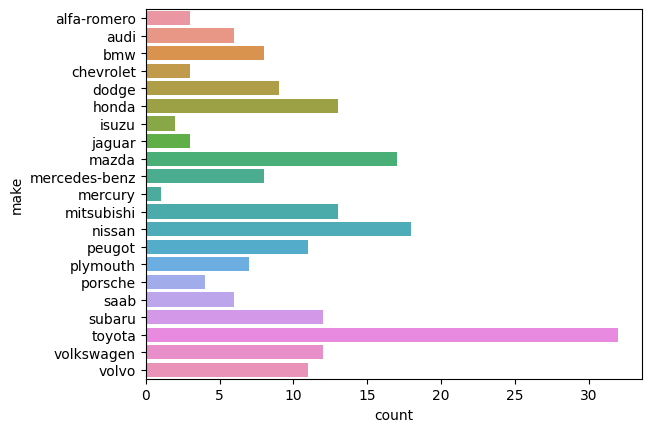

In [30]:
fig = plt.figure()
sns.countplot(y='make', data=final_cars);
print(final_cars.make.value_counts())

By far the car company with the biggest offering is Toyota. Further exploration into how this translates to sales relative to other companies would be interesting

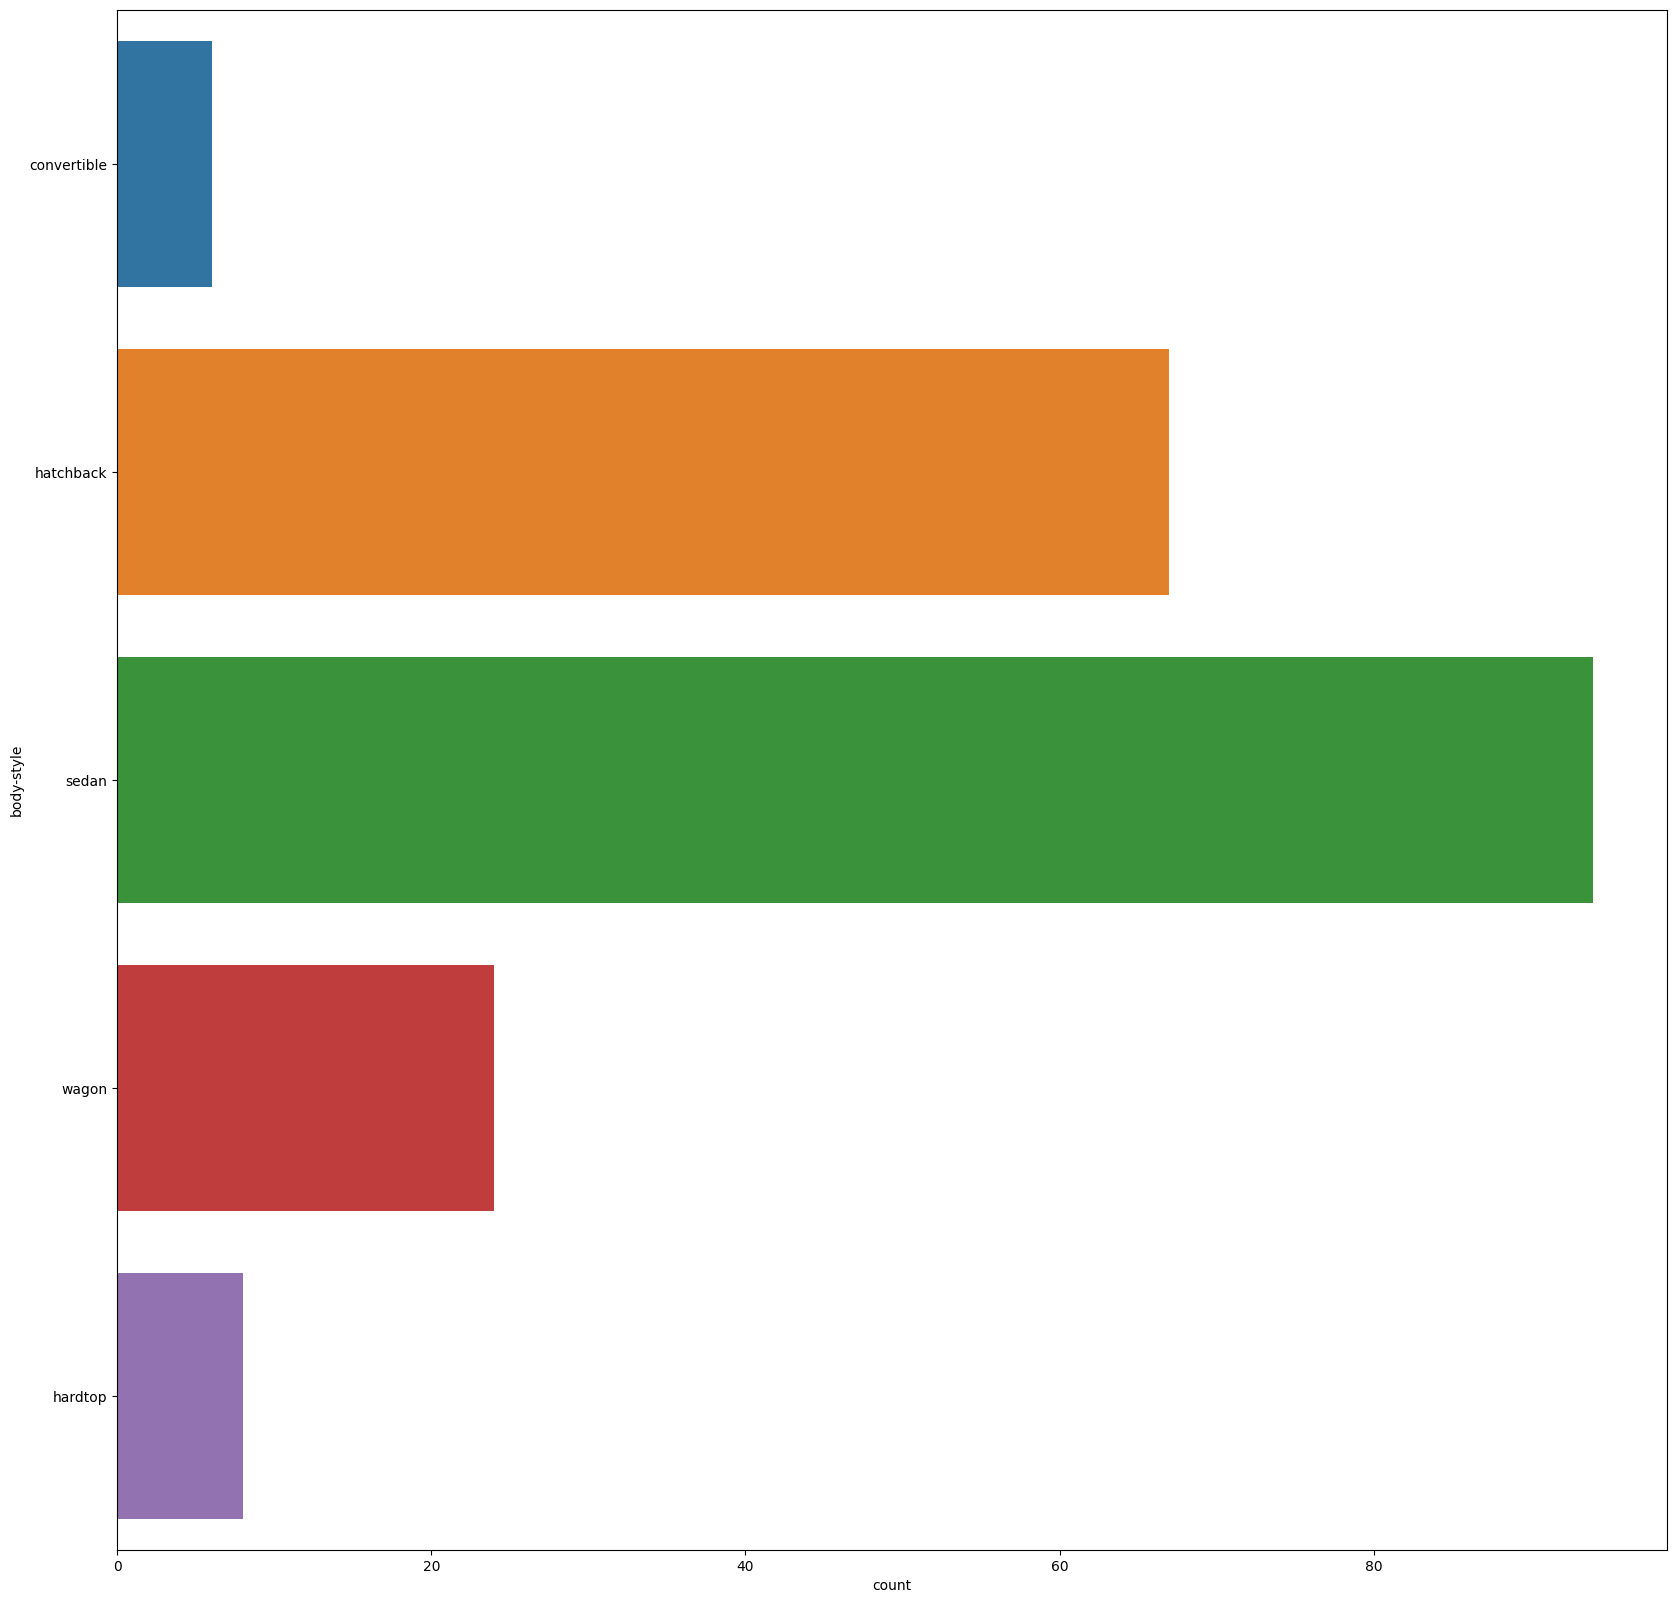

In [31]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=final_cars['body-style'], data=final_cars);

The most popular body type is the sedan. Further exploration as to which makes contribute most to this and the average price of a sedan would be interesting

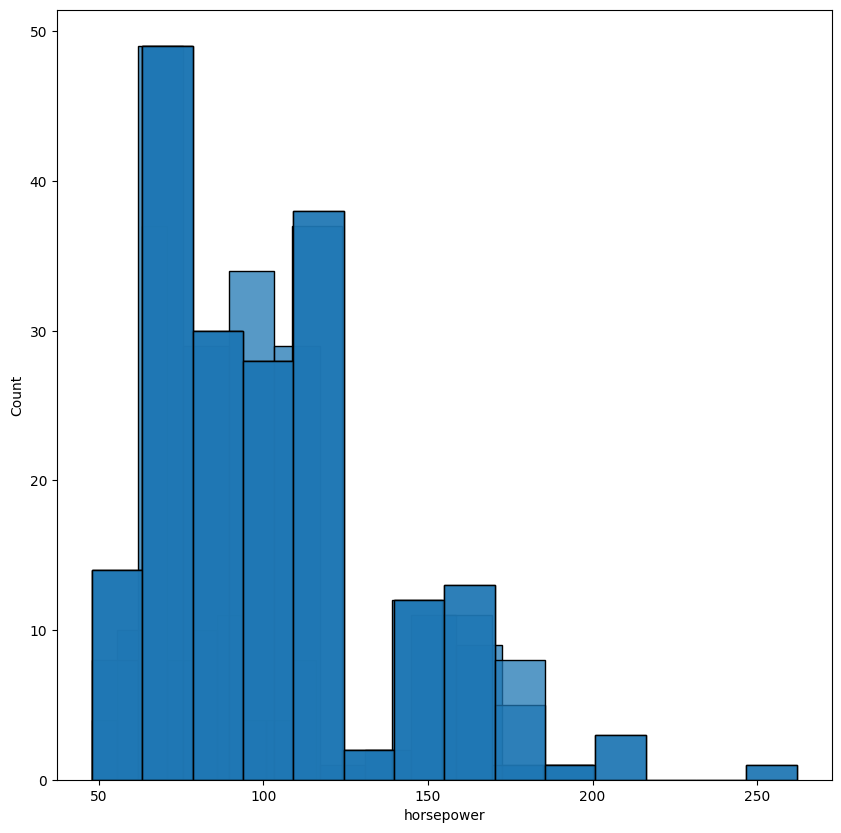

In [33]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(final_cars.loc[final_cars['price'] <= 9999 ]['horsepower'], kde_kws={'label': ' <10k ($)'});
sns.histplot(final_cars.loc[final_cars['price'] <= 19999 ]['horsepower'], kde_kws={'label': ' 10k - 20k ($)'});
sns.histplot(final_cars.loc[final_cars['price'] <= 29999 ]['horsepower'], kde_kws={'label': ' 20k - 30k ($)'});
sns.histplot(final_cars.loc[final_cars['price'] <= 39999 ]['horsepower'], kde_kws={'label': ' 30k - 40k ($)'});
sns.histplot(final_cars.loc[final_cars['price'] <= 49999 ]['horsepower'], kde_kws={'label': ' 40k - 50k ($)'});
sns.histplot(final_cars.loc[final_cars['price'] > 49999 ]['horsepower'], kde_kws={'label': ' 50k+ ($)'});


The histogram shows the majority of cheaper models have lower horsepower. Horsepower seems to be one of the most valuable/expensive attributes for a car. Models with high horsepower are both expensive and rare.